In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data understading

In [3]:
df = pd.read_csv(r"C:\Users\Brind\Desktop\tudo\processos seletivos\4tune.ai\data.csv", sep = ',')
df.head()

,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,1,45,591,1,1,1,161474.307306,0.24,248327.61
2,2,59,613,1,1,1,14209.331170,0.09,24371.94
3,3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,4,45,567,2,1,5,282353.182490,0.22,47808.66


In [6]:
#ver a quantidade de linhas
df.shape

(47626, 9)

In [8]:
#ver o tipo de cada um dos data para ver se será necessário alguma alteração
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47626 entries, 0 to 47625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           47626 non-null  int64  
 1   initial_age          47626 non-null  int64  
 2   weight               47626 non-null  int64  
 3   family_kind          47626 non-null  int64  
 4   race                 47626 non-null  int64  
 5   marital_status       47626 non-null  int64  
 6   accumulated_capital  47626 non-null  float64
 7   annual_contribution  47626 non-null  float64
 8   income               47626 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.3 MB


In [9]:
#ver variaçãos das colunas
df.describe()

,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
count,47626.000000,47626.000000,47626.000000,47626.000000,47626.000000,47626.000000,4.762600e+04,47626.000000,47626.000000
mean,23812.500000,48.379793,1551.159535,1.730756,1.693634,2.245454,2.483036e+04,0.175277,70240.892997
std,13748.586297,8.064861,942.788098,0.852361,1.014817,1.554839,1.705045e+05,0.101389,49720.565014
min,0.000000,35.000000,98.000000,1.000000,1.000000,1.000000,-5.119091e+05,0.000000,250.650000
25%,11906.250000,42.000000,811.250000,1.000000,1.000000,1.000000,-8.116163e+04,0.090000,33878.760000
50%,23812.500000,48.000000,1500.000000,1.000000,1.000000,1.000000,2.280218e+04,0.180000,59084.150000
75%,35718.750000,55.000000,1971.000000,3.000000,2.000000,3.000000,1.016781e+05,0.260000,94320.602500
max,47625.000000,63.000000,9349.000000,3.000000,4.000000,5.000000,1.111905e+06,0.350000,473601.750000


In [10]:
df['weight'].value_counts()

1628    55
1712    55
1596    52
255     51
1691    51
        ..
4092     1
4851     1
3609     1
4577     1
4321     1
Name: weight, Length: 3886, dtype: int64

# Data preparation

In [4]:
#retirar columas unnamed
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,45,591,1,1,1,161474.307306,0.24,248327.61
2,59,613,1,1,1,14209.331170,0.09,24371.94
3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,45,567,2,1,5,282353.182490,0.22,47808.66


In [59]:
#adicionar as faixas etarias para fazer os agrupamentos

df['faixa_etaria'] = 'nenhuma'
for i in range(0,len(df)):
    
    if df['initial_age'][i] >= 35 and df['initial_age'][i] <= 39:
        df['faixa_etaria'][i] = '35 - 39'
            
    elif df['initial_age'][i] >= 40 and df['initial_age'][i] <= 44:
        df['faixa_etaria'][i] = '40 - 44'
            
    elif df['initial_age'][i] >= 45 and df['initial_age'][i] <= 49:
        df['faixa_etaria'][i] = '45 - 49'
            
    elif df['initial_age'][i] >= 50 and df['initial_age'][i] <= 54:
        df['faixa_etaria'][i] = '50 - 54'
            
    elif df['initial_age'][i] >= 55 and df['initial_age'][i] <= 59:
        df['faixa_etaria'][i] = '55 - 59'
    
    elif df['initial_age'][i] >= 60 and df['initial_age'][i] <= 64:
        df['faixa_etaria'][i] = '60 - 64'

C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/2862559991.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faixa_etaria'][i] = '55 - 59'
C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/2862559991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faixa_etaria'][i] = '45 - 49'
C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/2862559991.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faixa_etaria'][i] = '60 -

In [6]:
#Definir constantes e variáveis
idade_aposentar = 65
taxa_inflacao = 0.044
percetual = 0.5
limite = 10000



df['new_accumulated_capital'] = 0

# Passo 2: Implementar o for para calcular novo accumulated_capital(novo capital acumulado)
for i in range(0,len(df)):
    idade_inicial = int(df['initial_age'][i])
    income = float(df['income'][i])
    contrib_anual = float(df['annual_contribution'][i])
    capital_acu = float(df['accumulated_capital'][i])

    for idade in range(idade_inicial, idade_aposentar + 1):
        annual_contribution_adjusted = income * (contrib_anual / 100)
        montante = min(annual_contribution_adjusted, limite) * percetual
        capital_acu += montante

        # Ajustar renda anual para o próximo ano com base na taxa de inflação
        income *= (1 + taxa_inflacao)
    
    df['new_accumulated_capital'][i] = capital_acu


C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/3500388107.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_accumulated_capital'][i] = capital_acu


In [36]:
df.to_csv(r"C:\Users\Brind\Downloads\new_scenario.csv")

In [7]:
#1 eliminação
#saber se a pessoas será ou não eliminada do programa
df['eliminacao'] = 'eliminado'
for i in range(0,len(df)):
    
    #pessoas que colocam casadas porem nao apresentam o comprovante nao podem participar
    if df['family_kind'][i] == 1 and (df['marital_status'][i] == 1 or  df['marital_status'][i] == 2) and df['income'][i] < 41000:
        df['eliminacao'][i] = 'nao eliminado'
    
    #pessoas que colocam como chefe de familia mas nao apresentam que são separados ou divorciados nao podem participar
    elif (df['family_kind'][i] == 2 or df['family_kind'][i] == 3) and (df['marital_status'][i] == 3 or df['marital_status'] == 4).any() and df['income'][i] < 30750:
        df['eliminacao'][i] = 'nao eliminado'
    
    #o resto cai no valor de solteiros
    elif df['income'][i] < 20500:
        df['eliminacao'][i] = 'nao eliminado'

        

C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/10937434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eliminacao'][i] = 'nao eliminado'
C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/10937434.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eliminacao'][i] = 'nao eliminado'


In [8]:
df['eliminacao'].value_counts()

eliminado        34476
nao eliminado    13150
Name: eliminacao, dtype: int64

In [9]:
#retirar as pessoas que nao podem participar

remover = df[df['eliminacao'] =='eliminado']

df_2 = df.drop(remover.index)

In [10]:
df_2.reset_index(inplace = True, drop = True)

In [11]:
# 2 eliminação
#saber se a pessoas será ou não eliminada do programa
df_2['eliminacao_2'] = 'eliminado'
for i in range(0,len(df_2)):
    
    #pessoas que colocam casadas porem nao apresentam o comprovante nao podem participar
    if df_2['family_kind'][i] == 1 and (df_2['marital_status'][i] == 1 or  df_2['marital_status'][i] == 2) and df_2['income'][i] < 71000:
        df_2['eliminacao_2'][i] = 'nao eliminado'
    
    #pessoas que colocam como chefe de familia mas nao apresentam que são separados ou divorciados nao podem participar
    elif (df_2['family_kind'][i] == 2 or df_2['family_kind'][i] == 3) and (df_2['marital_status'][i] == 3 or df_2['marital_status'] == 4).any() and df_2['income'][i] < 53250:
        df_2['eliminacao_2'][i] = 'nao eliminado'
    
    #o resto cai no valor de solteiros
    elif df_2['income'][i] < 35500:
        df_2['eliminacao_2'][i] = 'nao eliminado'


   

C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/1240343558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['eliminacao_2'][i] = 'nao eliminado'
C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/1240343558.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['eliminacao_2'][i] = 'nao eliminado'


In [12]:
df_2.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,new_accumulated_capital,eliminacao,eliminacao_2
0,59,613,1,1,1,14209.331170,0.09,24371.94,14297,nao eliminado,nao eliminado
1,40,300,1,1,1,186133.535897,0.12,31875.40,187030,nao eliminado,nao eliminado
2,35,318,1,1,1,101335.187150,0.03,31627.77,101637,nao eliminado,nao eliminado
3,54,538,2,1,5,-100385.681581,0.23,30736.38,-99842,nao eliminado,nao eliminado
4,45,644,2,1,5,144259.266170,0.18,29561.58,145148,nao eliminado,nao eliminado


In [13]:
#adicionar as faixas etarias para fazer os agrupamentos

df_2['faixa_etaria'] = 'nenhuma'
for i in range(0,len(df_2)):
    
    if df_2['initial_age'][i] >= 35 and df_2['initial_age'][i] <= 39:
        df_2['faixa_etaria'][i] = '35 - 39'
            
    elif df_2['initial_age'][i] >= 40 and df_2['initial_age'][i] <= 44:
        df_2['faixa_etaria'][i] = '40 - 44'
            
    elif df_2['initial_age'][i] >= 45 and df_2['initial_age'][i] <= 49:
        df_2['faixa_etaria'][i] = '45 - 49'
            
    elif df_2['initial_age'][i] >= 50 and df_2['initial_age'][i] <= 54:
        df_2['faixa_etaria'][i] = '50 - 54'
            
    elif df_2['initial_age'][i] >= 55 and df_2['initial_age'][i] <= 59:
        df_2['faixa_etaria'][i] = '55 - 59'
    
    elif df_2['initial_age'][i] >= 60 and df_2['initial_age'][i] <= 64:
        df_2['faixa_etaria'][i] = '60 - 64'

C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/891534157.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['faixa_etaria'][i] = '55 - 59'
C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/891534157.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['faixa_etaria'][i] = '40 - 44'
C:\Users\Brind\AppData\Local\Temp/ipykernel_18932/891534157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['faixa_etaria'][i] = '35

In [14]:
df_2['faixa_etaria'].value_counts()

45 - 49    2492
40 - 44    2481
50 - 54    2377
35 - 39    2245
55 - 59    2155
60 - 64    1400
Name: faixa_etaria, dtype: int64

# Questoes pedidas

In [25]:
#Calcular média ponderada da falta de economias para aposentadoria por raça e faixa etária


df_falta = df_2[df_2['new_accumulated_capital']<0]
group_falta = df_falta.groupby(['race', 'faixa_etaria'])['new_accumulated_capital'].apply(lambda x: np.average(x, weights=df.loc[x.index, 'weight']))
pd.DataFrame(group_falta)

new_accumulated_capital
race faixa_etaria                         
1    35 - 39                -122738.074582
     40 - 44                -120497.438007
     45 - 49                -121172.818997
     50 - 54                -122779.965322
     55 - 59                -115573.086625
     60 - 64                -112633.047947
2    35 - 39                -139537.886873
     40 - 44                -123815.117019
     45 - 49                -115860.803800
     50 - 54                -125185.028992
     55 - 59                -128996.005641
     60 - 64                -119806.235898
3    35 - 39                -133515.616311
     40 - 44                -124960.227103
     45 - 49                -134643.773460
     50 - 54                -125979.187180
     55 - 59                -117643.934807
     60 - 64                -121696.510926
4    35 - 39                -119625.691819
     40 - 44                -107249.910540
     45 - 49                 -86222.241255
     50 - 54                -126903.440978
     55 - 59                -114215.006310
     60 - 64                -140156.785366

In [26]:

# Passo 5: Calcular média ponderada da falta de economias para aposentadoria por raça e faixa etária
age_groups = ['35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65']  # Faixas etárias
race_groups = [1, 2, 3, 4]  # Raças


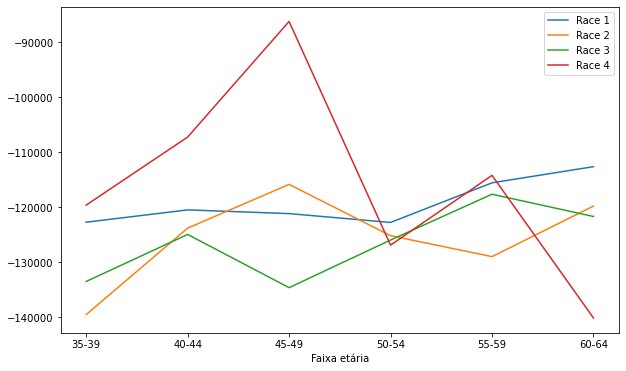

In [28]:
#Média ponderada da falta de economias para aposentadoria por raça e faixa etária

plt.figure(figsize=(10, 6))
for race in race_groups:
    plt.plot(age_groups[:-1], group_falta[race], label=f'Race {race}')
plt.xlabel('Faixa etária')
plt.legend()
plt.show()



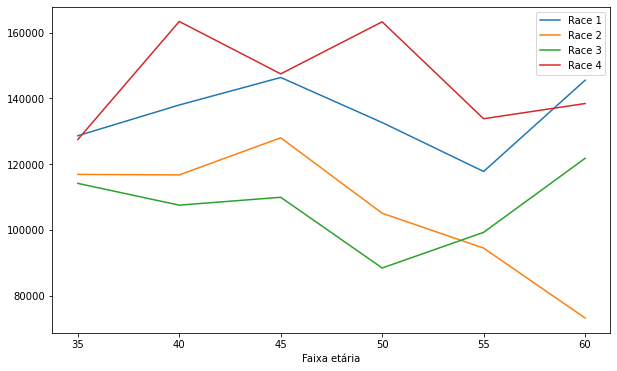

In [92]:
#Média ponderada de economias para aposentadoria por raça e faixa etária
df_aposent = df_2[df_2['new_accumulated_capital']>0]
group_novo = df_aposent.groupby(['race', 'faixa_etaria'])['new_accumulated_capital'].apply(lambda x: np.average(x, weights=df.loc[x.index, 'weight']))
pd.DataFrame(group_novo)

plt.figure(figsize=(10, 6))
for race in race_groups:
    plt.plot(age_groups[:-1], group_novo[race], label=f'Race {race}')
plt.xlabel('Faixa etária')
plt.legend()
plt.show()


In [30]:
#pessoas que iriam se aposentar - seriam pessoas que tivessem o valor acumuated_capital acima de 0
df_apo = df[df['accumulated_capital'] > 0]

#numero de pessoas percentual que conseguiram a aposentadoria antes da mudança
percent_ant = df_apo['initial_age'].count()/df['initial_age'].count()
percent_ant*100

59.156763112585566

In [31]:
#pessoas que conseguiram a aposentadoria

df_2_ok = df_2[df_2['new_accumulated_capital'] > 0]

#numero de pessoas percentual que conseguiram a aposentadoria depois da mudança
percent_nov = df_2_ok['initial_age'].count()/df['initial_age'].count()
percent_nov*100

16.72825767437954

# Soma do acúmulo de todas as pessoas que tiveram déficits

In [171]:
#falta de economias para aposentadoria antes da mudança

df_n_apo = df[df['accumulated_capital'] < 0]

soma = round(df_n_apo['accumulated_capital'].sum()/df['initial_age'].count(), 2)

#depois do ajuste

df_n_apo_ajus = df[df['new_accumulated_capital'] < 0]

soma_ajust = round(df_n_apo_ajus['new_accumulated_capital'].sum()/df['initial_age'].count(), 2)




In [172]:
print(soma, soma_ajust)

-50065.58 -49365.13


# Respostas

- O indice de prontidão de pessoas que irão se aposentar será de 16% considerando do total de pessoas
- O indice de prontidão anterior era de 59% já que nao existia eliminação como nesse novo cenário
- A falta de aposentadoria depois do ajuste é de 49.365,13 enquanto a sem o ajuste é de 50.065,58

In [89]:
df_aposent_antes = df[df['new_accumulated_capital']>0]
group_a = df_aposent_antes.groupby(['race', 'faixa_etaria']).agg({'initial_age': 'count'})
group_a['percentual % antes'] = round(group_a['initial_age']/df['initial_age'].count()*100, 2)
group_a.drop(columns = 'initial_age', inplace = True)
group_a



percentual % antes
race faixa_etaria                    
1    35 - 39                     6.69
     40 - 44                     7.31
     45 - 49                     7.37
     50 - 54                     6.99
     55 - 59                     6.40
     60 - 64                     4.33
2    35 - 39                     1.25
     40 - 44                     1.32
     45 - 49                     1.31
     50 - 54                     1.19
     55 - 59                     1.14
     60 - 64                     0.76
3    35 - 39                     1.92
     40 - 44                     1.90
     45 - 49                     1.57
     50 - 54                     1.34
     55 - 59                     1.01
     60 - 64                     0.60
4    35 - 39                     1.05
     40 - 44                     1.05
     45 - 49                     0.84
     50 - 54                     0.88
     55 - 59                     0.82
     60 - 64                     0.50

In [91]:
#Pessoas aptas a se aposentarem depois da reforma por faixa etaria e raça


df_aposent = df_2[df_2['new_accumulated_capital']>0]
group = df_aposent.groupby(['race', 'faixa_etaria']).agg({'initial_age': 'count'})
group['percentual %'] = round(group['initial_age']/df['initial_age'].count()*100, 2)
group.drop(columns = 'initial_age', inplace = True)
group['percentual % antes'] = group_a['percentual % antes']
group['impacto'] = group_a['percentual % antes'] - group['percentual %']
group

percentual %  percentual % antes  impacto
race faixa_etaria                                           
1    35 - 39               1.91                6.69     4.78
     40 - 44               2.10                7.31     5.21
     45 - 49               2.14                7.37     5.23
     50 - 54               2.01                6.99     4.98
     55 - 59               1.84                6.40     4.56
     60 - 64               1.25                4.33     3.08
2    35 - 39               0.31                1.25     0.94
     40 - 44               0.33                1.32     0.99
     45 - 49               0.34                1.31     0.97
     50 - 54               0.30                1.19     0.89
     55 - 59               0.30                1.14     0.84
     60 - 64               0.22                0.76     0.54
3    35 - 39               0.50                1.92     1.42
     40 - 44               0.49                1.90     1.41
     45 - 49               0.44                1.57     1.13
     50 - 54               0.36                1.34     0.98
     55 - 59               0.30                1.01     0.71
     60 - 64               0.16                0.60     0.44
4    35 - 39               0.29                1.05     0.76
     40 - 44               0.33                1.05     0.72
     45 - 49               0.24                0.84     0.60
     50 - 54               0.23                0.88     0.65
     55 - 59               0.20                0.82     0.62
     60 - 64               0.14                0.50     0.36

<AxesSubplot:xlabel='faixa_etaria', ylabel='impacto'>

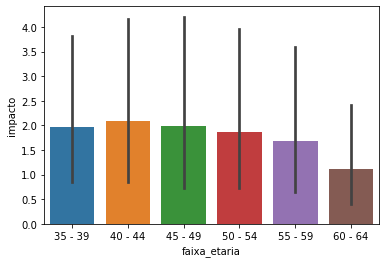

In [97]:
group.reset_index(inplace = True)
sns.barplot(data = group , x= 'faixa_etaria', y = 'impacto')